In [1]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

path  = "./kg_data/"

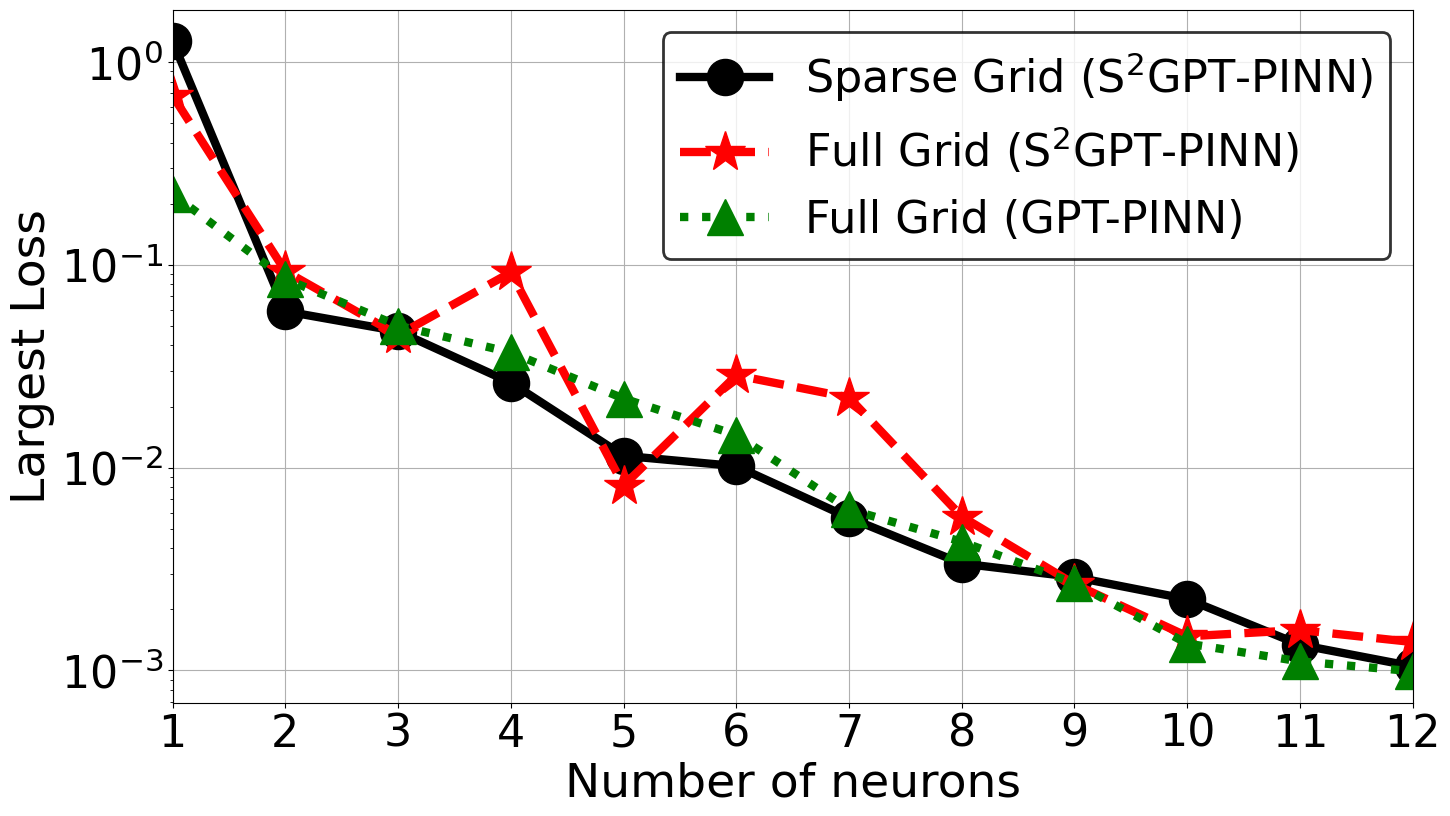

In [12]:
# plot1
loss_list_sgpt_full_grid   = np.loadtxt(path+"bic_sgpt_loss_list_full_grid.dat") # (13,)
loss_list_sgpt_sparse_grid = np.loadtxt(path+"bic_sgpt_loss_list.dat") # (13,)
loss_list_gpt              = np.loadtxt(path+"gpt_loss_list.dat") # (13,)
fig, ax = plt.subplots(figsize=(16,9))
min_neuron = 0
max_neuron = 12
x = range(min_neuron+1,max_neuron+1)
ax.plot(x, loss_list_sgpt_sparse_grid[min_neuron:max_neuron], color="black", linestyle="solid",  marker="o", ms=26, label="Sparse Grid (S$^2$GPT-PINN)", lw=6)
ax.plot(x, loss_list_sgpt_full_grid[min_neuron:max_neuron],   color="red",   linestyle="dashed", marker="*", ms=30, label="Full Grid (S$^2$GPT-PINN)",   lw=6)
ax.plot(x, loss_list_gpt[min_neuron:max_neuron],              color="green", linestyle="dotted", marker="^", ms=26, label="Full Grid (GPT-PINN)",    lw=6)
ax.set_xticks(ticks=x)
ax.set_xlim(min(x),max(x))
ax.set_yscale("log")
ax.set_xlabel("Number of neurons", fontsize=34)
ax.set_ylabel("Largest Loss", fontsize=34)
legend = ax.legend(frameon=True, fontsize=32)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.grid()
ax.tick_params(axis='both', which='major', labelsize=32)
plt.show()

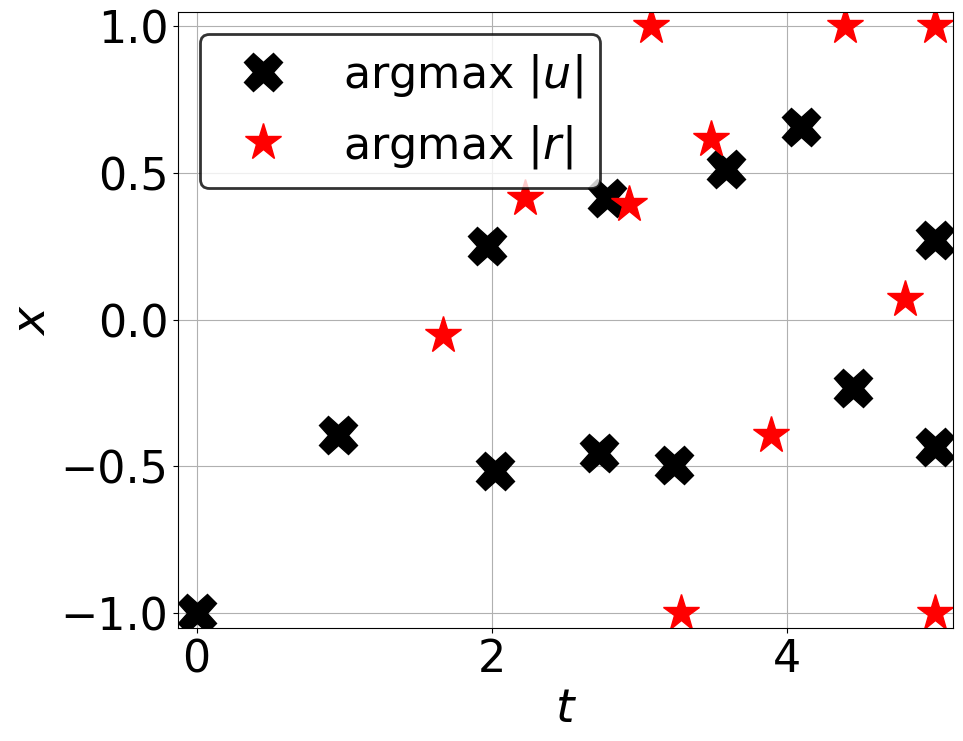

In [5]:
# Sparse training grid (plot3)
xt_resid   = np.loadtxt(path+"xt_resid.dat") # (10000,2)
X_umax_idx = np.loadtxt(path+"X_umax_idx.dat").astype(np.int64) # (13,)
X_rmax_idx = np.loadtxt(path+"X_rmax_idx.dat").astype(np.int64) # (12,)


x_u = xt_resid[X_umax_idx,0]
t_u = xt_resid[X_umax_idx,1]

x_r = xt_resid[X_rmax_idx,0]
t_r = xt_resid[X_rmax_idx,1]

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_u, x_u, "X", color="black", label="argmax $|u|$", markersize=28)
ax.plot(t_r, x_r, "*", color="red",   label="argmax $|r|$", markersize=28)
ax.set_xlim(0-0.125,5+0.125)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylim(-1-0.05,1+0.05)
ax.set_ylabel("$x$", fontsize=34)
legend = ax.legend(frameon=True, fontsize=32)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=32)
ax.grid()
plt.show()

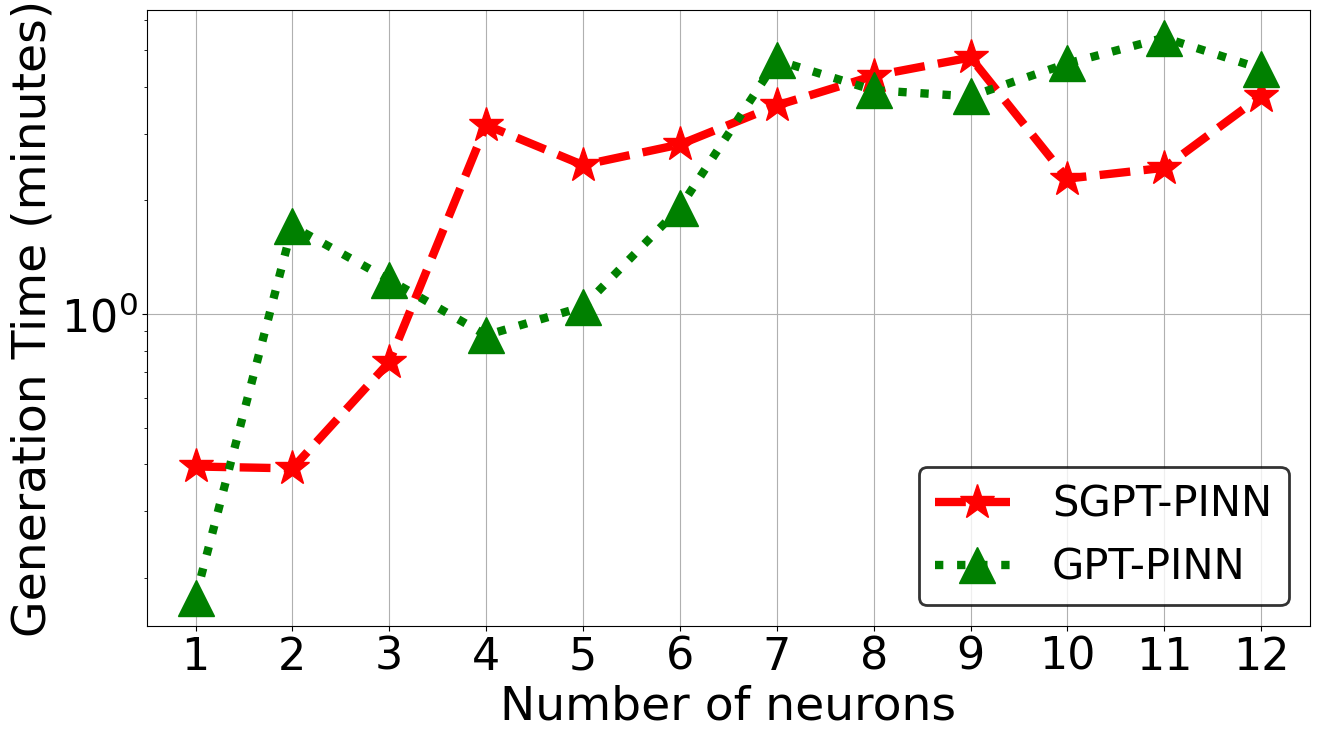

In [6]:
#plot4
params               = np.load(path+"params_sgpt_bic_adam.npy", allow_pickle=True).item()
total_epochs         = params['epochs bic_sgpt train'] * params['parameter size']
generation_time_sgpt = np.loadtxt(path+"bic_sgpt_generation_time.dat") # (13,)
#epoch_cnt_sgpt       = np.loadtxt(path+"epoch_cnt_sgpt.dat") # (13,)
generation_time_gpt  = np.loadtxt(path+"gpt_generation_time.dat") # (13,)
#epoch_cnt_gpt        = np.loadtxt(path+"epoch_cnt_gpt.dat") # (13,)

fig, ax = plt.subplots(figsize=(15,8))
x = range(1,len(generation_time_sgpt)+1)

ax.plot(x, generation_time_sgpt[min_neuron:max_neuron], color="red", linestyle="dashed",  marker="*", label="SGPT-PINN", lw=6, ms=26)
#for i, txt in enumerate(epoch_cnt_sgpt):
 #   ax.annotate(round(txt/total_epochs,3), (x[i], generation_time_sgpt[i]-1), fontsize=22, c="k")
    
ax.plot(x, generation_time_gpt[min_neuron:max_neuron], color="green", linestyle="dotted", marker="^", ms=26, label="GPT-PINN", lw=6)
#for i, txt in enumerate(epoch_cnt_gpt):
 #   ax.annotate(round(txt/total_epochs,3), (x[i], generation_time_gpt[i]-1), fontsize=22, c="k")

ax.set_xticks(ticks=x)
ax.set_yticks(ticks=np.linspace(0,20,9))
ax.set_xlim(0.5,max(x)+0.5)
#ax.set_ylim(-2.5,2.5)
ax.set_xlabel("Number of neurons", fontsize=34)
ax.set_ylabel("Generation Time (minutes)", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=32)
ax.grid()
plt.yscale('log')
plt.show()

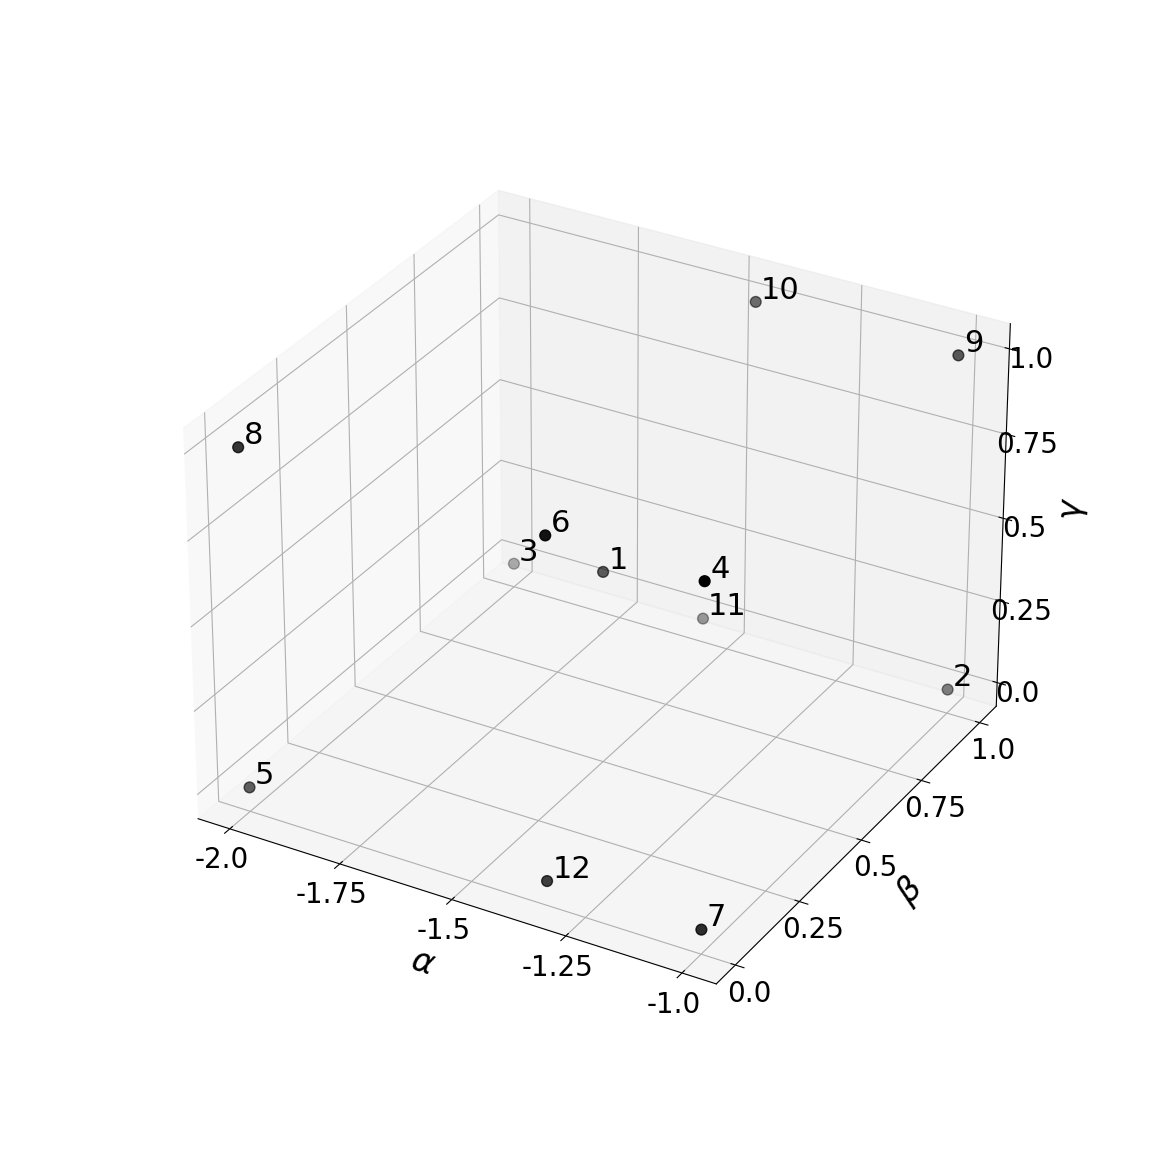

In [2]:
# plot5
neurons_sgpt = np.loadtxt(path+"bic_sgpt_neurons.dat") # (13,3)


# SGPT neurons (plot5)

alpha = neurons_sgpt[:,0]
beta  = neurons_sgpt[:,1]
gamma = neurons_sgpt[:,2]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alpha, beta, gamma, c="k", s=60)

for i, _ in enumerate(neurons_sgpt):
    ax.text(alpha[i]+0.0075,beta[i]+0.0075,gamma[i]+0.0075, f"{i+1}", c="k", 
            fontsize=22)

alpha_ticks = np.linspace(-2, -1, 5)
beta_ticks  = np.linspace( 0,  1, 5)
gamma_ticks = np.linspace( 0,  1, 5)

ax.set_xticks(ticks=alpha_ticks, labels=[str(i) for i in alpha_ticks])
ax.set_yticks(ticks=beta_ticks,  labels=[str(i) for i in beta_ticks])
ax.set_zticks(ticks=gamma_ticks, labels=[str(i) for i in gamma_ticks])

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
ax.yaxis.set_minor_locator(minorLocator)
ax.zaxis.set_minor_locator(minorLocator)
ax.grid(which="minor")

ax.set_xlabel(r"$\alpha$", labelpad=20, fontsize=24)
ax.set_ylabel(r"$\beta$",  labelpad=20, fontsize=24)
ax.set_zlabel(r"$\gamma$", labelpad=18, fontsize=24)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()


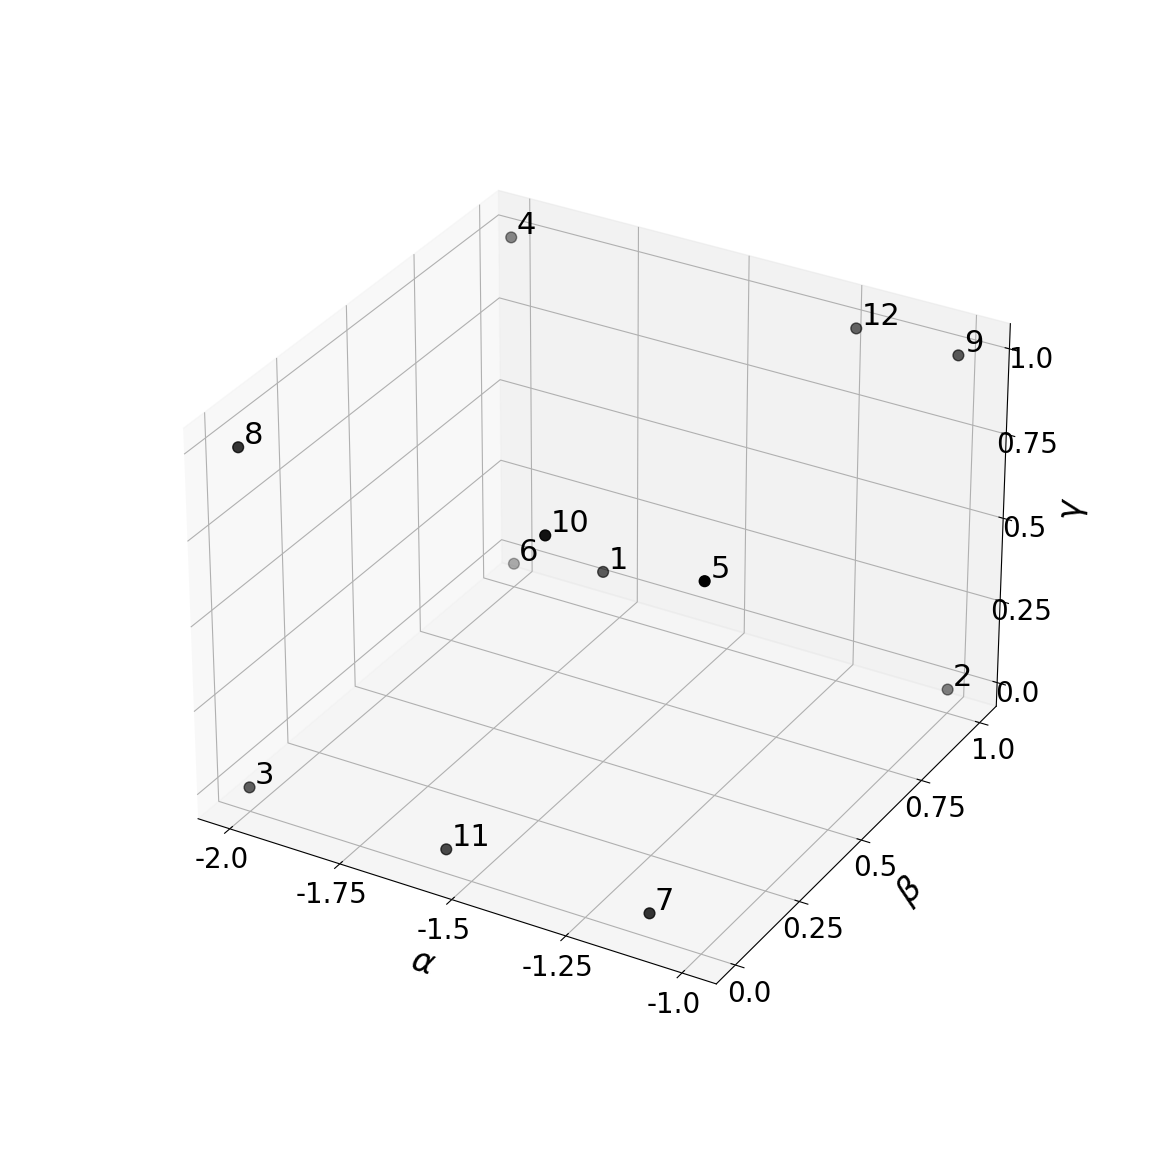

In [3]:
# plot6
neurons_gpt = np.loadtxt(path+"gpt_neurons.dat") # (13,3)

alpha = neurons_gpt[:,0]
beta  = neurons_gpt[:,1]
gamma = neurons_gpt[:,2]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alpha, beta, gamma, c="k", s=60)

for i, _ in enumerate(neurons_gpt):
    ax.text(alpha[i]+0.0075,beta[i]+0.0075,gamma[i]+0.0075, f"{i+1}", c="k", fontsize=22)

alpha_ticks = np.linspace(-2, -1, 5)
beta_ticks  = np.linspace( 0,  1, 5)
gamma_ticks = np.linspace( 0,  1, 5)

ax.set_xticks(ticks=alpha_ticks, labels=[str(i) for i in alpha_ticks])
ax.set_yticks(ticks=beta_ticks,  labels=[str(i) for i in beta_ticks])
ax.set_zticks(ticks=gamma_ticks, labels=[str(i) for i in gamma_ticks])

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
ax.yaxis.set_minor_locator(minorLocator)
ax.zaxis.set_minor_locator(minorLocator)
ax.grid(which="minor")

ax.set_xlabel(r"$\alpha$", labelpad=20, fontsize=24)
ax.set_ylabel(r"$\beta$",  labelpad=20, fontsize=24)
ax.set_zlabel(r"$\gamma$", labelpad=18, fontsize=24)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()

In [2]:
#plot 15
test_cases = np.loadtxt(path+"kg_test.dat")
xt_test  = np.loadtxt(path+"xt_test.dat")
test_pinn_soln = np.loadtxt(path+"test_pinn_soln.dat") # (1600,200) 
test_gpt_soln  = np.loadtxt(path+"test_gpt_soln.dat") # (1600,200)
test_sgpt_soln = np.loadtxt(path+"test_bic_sgpt_soln.dat") # (1600,200)

shape= [40,40]
x = xt_test[:,0].reshape(shape).transpose(1,0)
t = xt_test[:,1].reshape(shape).transpose(1,0)

index =67 #12
ex_gpt_soln = test_gpt_soln[:,index]
ex_sgpt_soln = test_sgpt_soln[:,index]
ex_pinn_soln = test_pinn_soln[:,index]

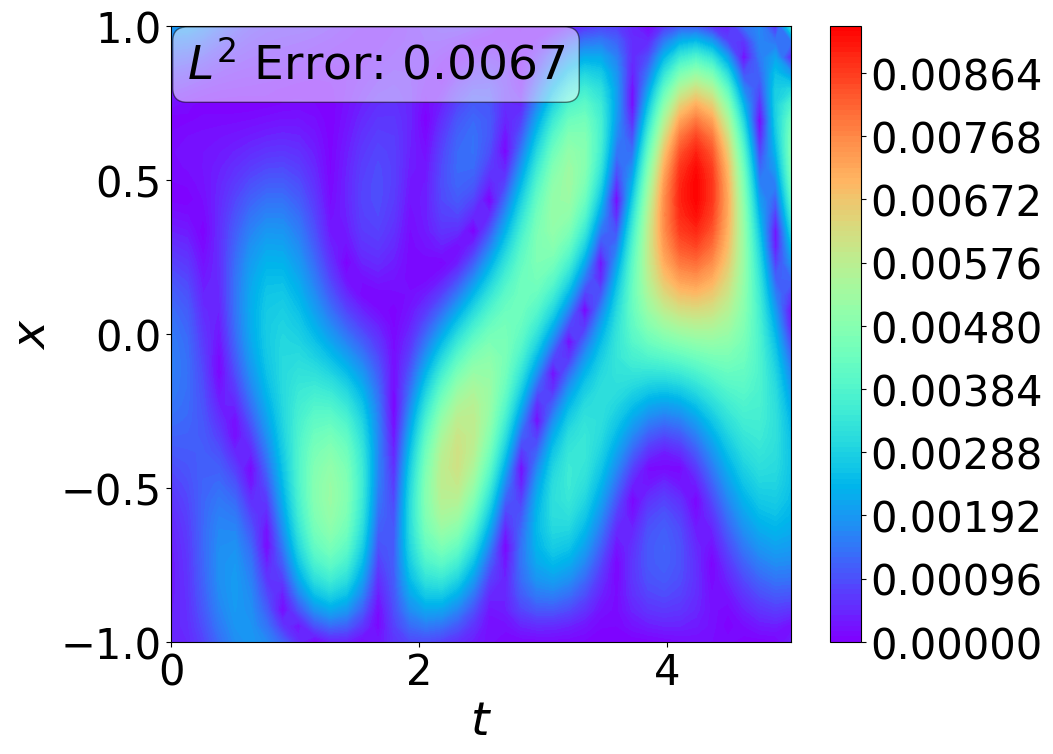

In [4]:
L2 = np.linalg.norm(ex_sgpt_soln - ex_pinn_soln) / np.linalg.norm(ex_pinn_soln)
fig, ax = plt.subplots(figsize=(10,8))
plot = ax.contourf(t, x, abs(ex_sgpt_soln-ex_pinn_soln).reshape(shape).transpose(1,0), 150, cmap="rainbow")
cbar = fig.colorbar(plot)
cbar.ax.tick_params(labelsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.025, 0.975, f"$L^2$ Error: {round(L2,4)}", transform=ax.transAxes, 
        fontsize=34, verticalalignment='top', bbox=props)
#ax.set_title(fr"Error SGPT-PINN: $\nu={round(test_cases[index,0],2),round(test_cases[index,1],2),round(test_cases[index,2],2)}$", fontsize=25,pad=15)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylabel("$x$", fontsize=34)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

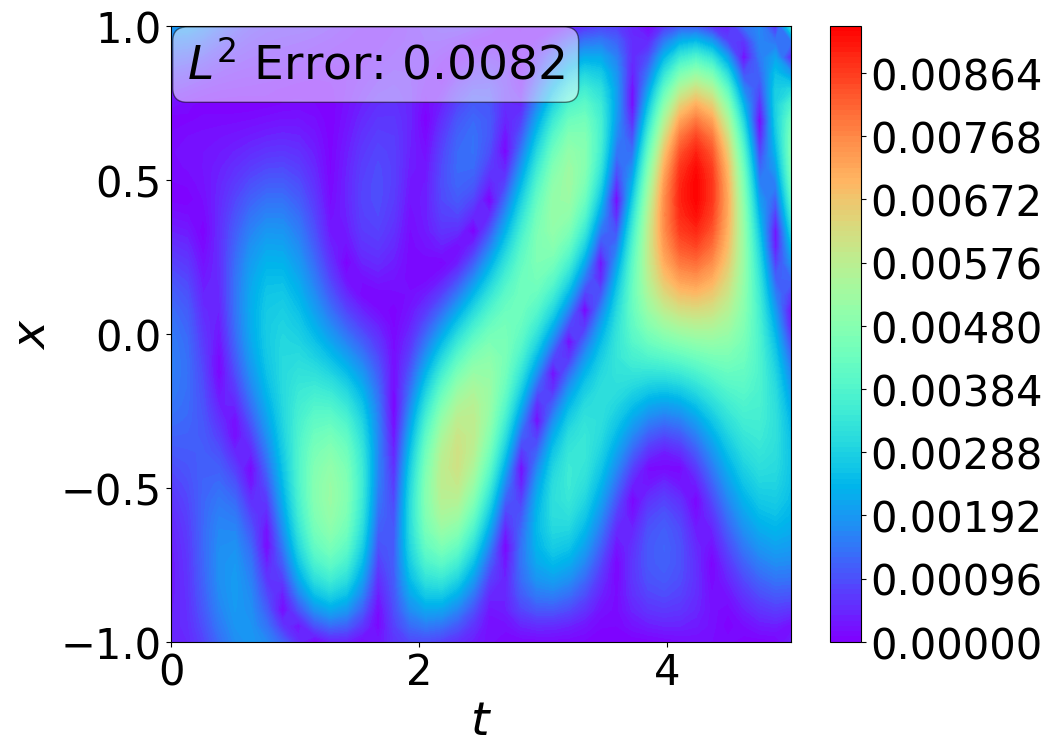

In [4]:
L2 = np.linalg.norm(ex_gpt_soln - ex_pinn_soln) / np.linalg.norm(ex_pinn_soln)
fig, ax = plt.subplots(figsize=(10,8))
plot = ax.contourf(t, x, abs(ex_sgpt_soln-ex_pinn_soln).reshape(shape).transpose(1,0), 150, cmap="rainbow")
cbar = fig.colorbar(plot)
cbar.ax.tick_params(labelsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.025, 0.975, f"$L^2$ Error: {round(L2,4)}", transform=ax.transAxes, 
        fontsize=34, verticalalignment='top', bbox=props)
#ax.set_title(fr"Error GPT-PINN: $\nu={round(test_cases[index,0],2),round(test_cases[index,1],2),round(test_cases[index,2],2)}$", fontsize=25,pad=15)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylabel("$x$", fontsize=34)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()

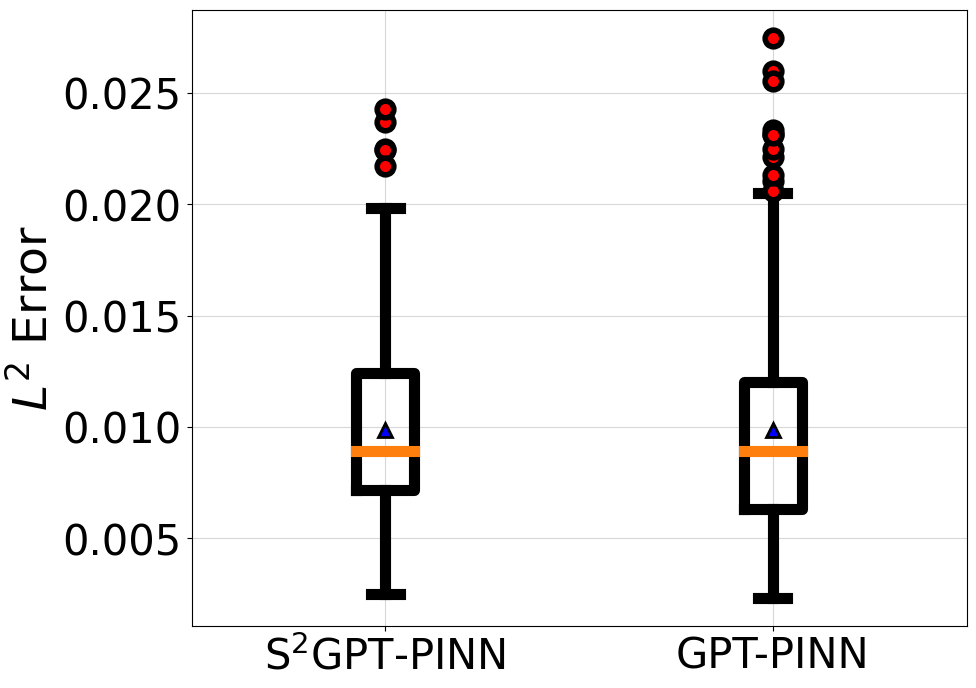

In [5]:
L2_sgpt = np.array([np.linalg.norm(test_sgpt_soln[:,i] - test_pinn_soln[:,i]) / np.linalg.norm(test_pinn_soln[:,i]) for i in range(test_pinn_soln.shape[1])])
L2_gpt  = np.array([np.linalg.norm( test_gpt_soln[:,i] - test_pinn_soln[:,i]) / np.linalg.norm(test_pinn_soln[:,i]) for i in range(test_pinn_soln.shape[1])])

errors = np.hstack((L2_sgpt[:,None], L2_gpt[:,None]))

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(errors, showmeans=True, boxprops=dict(linewidth=8), 
           whiskerprops=dict(linewidth=8), capprops=dict(linewidth=8),
           medianprops=dict(linewidth=8), meanprops=dict(marker='^',
           markersize=10, markerfacecolor='blue', markeredgecolor='black',
           markeredgewidth=2),
           flierprops=dict(marker='o',  markersize=12, linestyle='none', 
                           markerfacecolor='r', markeredgewidth=4))
ax.grid(alpha=0.5)
ax.set_ylabel("$L^2$ Error", fontsize=34)
ax.set_xticks([1,2], ["S$^2$GPT-PINN", "GPT-PINN"])
ax.tick_params(axis='both', which='major', labelsize=30)
#plt.yscale('log')
plt.show()

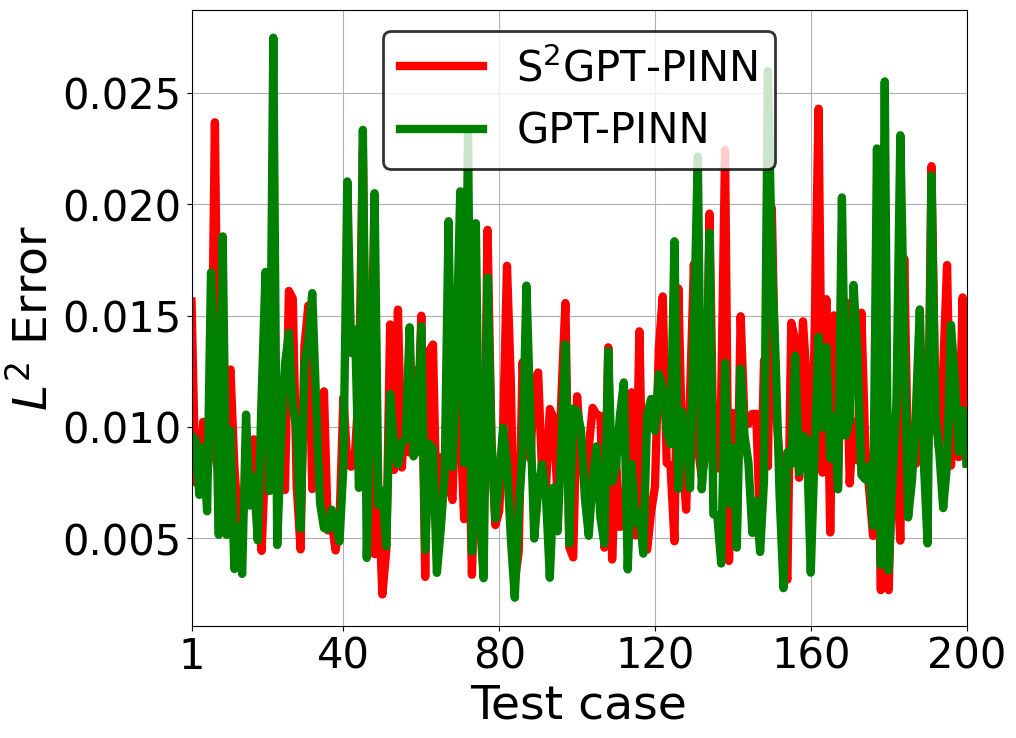

In [6]:
#plot 16
fig, ax = plt.subplots(figsize=(10,8))
x_plt16 = range(1,test_pinn_soln.shape[1]+1) 
x_ticks = list(range(0,test_pinn_soln.shape[1]+1,40))
x_ticks[0] = 1
ax.plot(x_plt16, L2_sgpt, color="red",   label="S$^2$GPT-PINN", lw=6)
ax.plot(x_plt16, L2_gpt,  color="green", label="GPT-PINN",  lw=6)
ax.set_xticks(ticks=x_ticks)
ax.set_xlim(min(x_plt16),max(x_plt16))
ax.set_xlabel("Test case", fontsize=34)
ax.set_ylabel("$L^2$ Error", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=30)
ax.grid()
#plt.yscale('log')
plt.show()

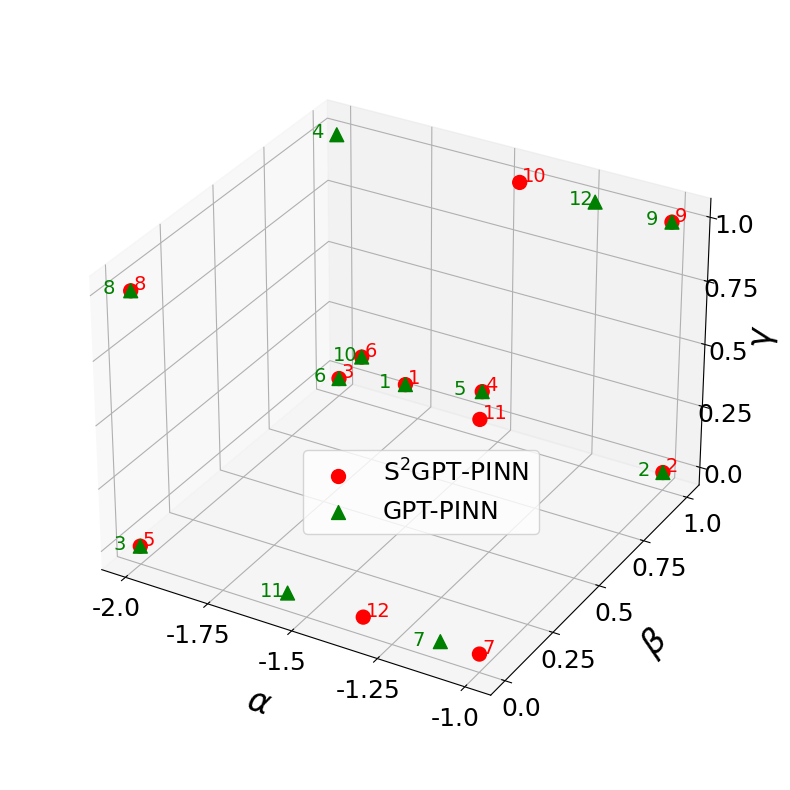

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
# Load data
path = "./kg_data/"  # Adjust the path as needed
neurons_sgpt = np.loadtxt(path + "bic_sgpt_neurons.dat")  # (13, 3)
neurons_gpt = np.loadtxt(path + "gpt_neurons.dat")        # (13, 3)

# SGPT neurons
alpha_sgpt = neurons_sgpt[:, 0]
beta_sgpt = neurons_sgpt[:, 1]
gamma_sgpt = neurons_sgpt[:, 2]

# GPT neurons
alpha_gpt = neurons_gpt[:, 0]
beta_gpt = neurons_gpt[:, 1]
gamma_gpt = neurons_gpt[:, 2]

# Create 3D figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot SGPT neurons
ax.scatter(alpha_sgpt, beta_sgpt, gamma_sgpt, color="red", s=100, label="S$^2$GPT-PINN", marker="o",alpha=1)
for i, _ in enumerate(neurons_sgpt):
    ax.text(alpha_sgpt[i] + 0.005, beta_sgpt[i] + 0.005, gamma_sgpt[i], 
            f"{i + 1}", color="red", fontsize=14,alpha=1)

# Plot GPT neurons
ax.scatter(alpha_gpt, beta_gpt, gamma_gpt, color="green", s=100, label="GPT-PINN", marker="^",alpha=1)
for i, _ in enumerate(neurons_gpt):
    ax.text(alpha_gpt[i] - 0.05, beta_gpt[i] - 0.05, gamma_gpt[i], 
            f"{i + 1}", color="green", fontsize=14,alpha=1)

# Set ticks
alpha_ticks = np.linspace(-2, -1, 5)
beta_ticks = np.linspace(0, 1, 5)
gamma_ticks = np.linspace(0, 1, 5)

ax.set_xticks(ticks=alpha_ticks, labels=[str(i) for i in alpha_ticks])
ax.set_yticks(ticks=beta_ticks, labels=[str(i) for i in beta_ticks])
ax.set_zticks(ticks=gamma_ticks, labels=[str(i) for i in gamma_ticks])

# Add minor ticks and grid
#minorLocator = MultipleLocator(1)
#ax.xaxis.set_minor_locator(minorLocator)
#ax.yaxis.set_minor_locator(minorLocator)
#ax.zaxis.set_minor_locator(minorLocator)
#ax.grid(which="minor")

# Set labels and legend
ax.set_xlabel(r"$\alpha$", labelpad=20, fontsize=24)
ax.set_ylabel(r"$\beta$", labelpad=20, fontsize=24)
ax.set_zlabel(r"$\gamma$", labelpad=8, fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=18)

# Add legend
ax.legend(fontsize=18,loc=(0.38, 0.32))

# Set box aspect and show plot
ax.set_box_aspect(aspect=None, zoom=0.9)
plt.show()


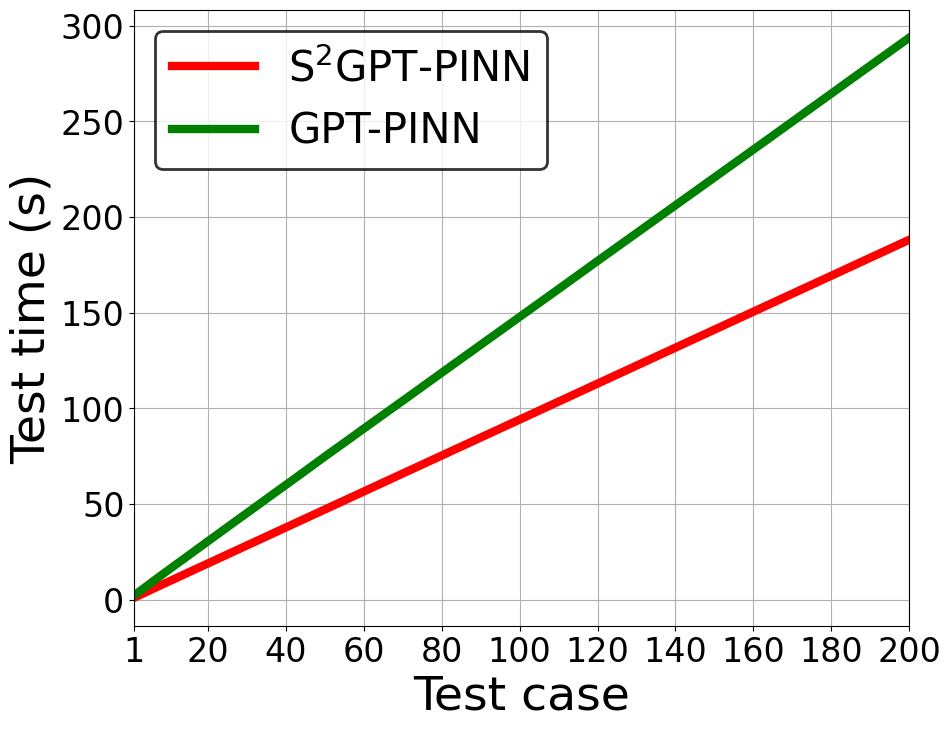

In [6]:
test_gpt_time  = np.loadtxt(path+"test_gpt_time.dat")# (1600,200)
test_sgpt_time = np.loadtxt(path+"test_bic_sgpt_time.dat")# (1600,200)


fig, ax = plt.subplots(figsize=(10,8))
x_plt16 = range(1,test_sgpt_time.shape[0]+1) 
x_ticks = list(range(0,test_sgpt_time.shape[0]+1,20))
x_ticks[0] = 1
ax.plot(x_plt16, test_sgpt_time*3600, color="red",   label="S$^2$GPT-PINN", lw=6)
ax.plot(x_plt16, test_gpt_time*3600,  color="green", label="GPT-PINN",  lw=6)
ax.set_xticks(ticks=x_ticks)
ax.set_xlim(min(x_plt16),max(x_plt16))
ax.set_xlabel("Test case", fontsize=34)
ax.set_ylabel("Test time (s)", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()
#plt.yscale('log')
plt.show()

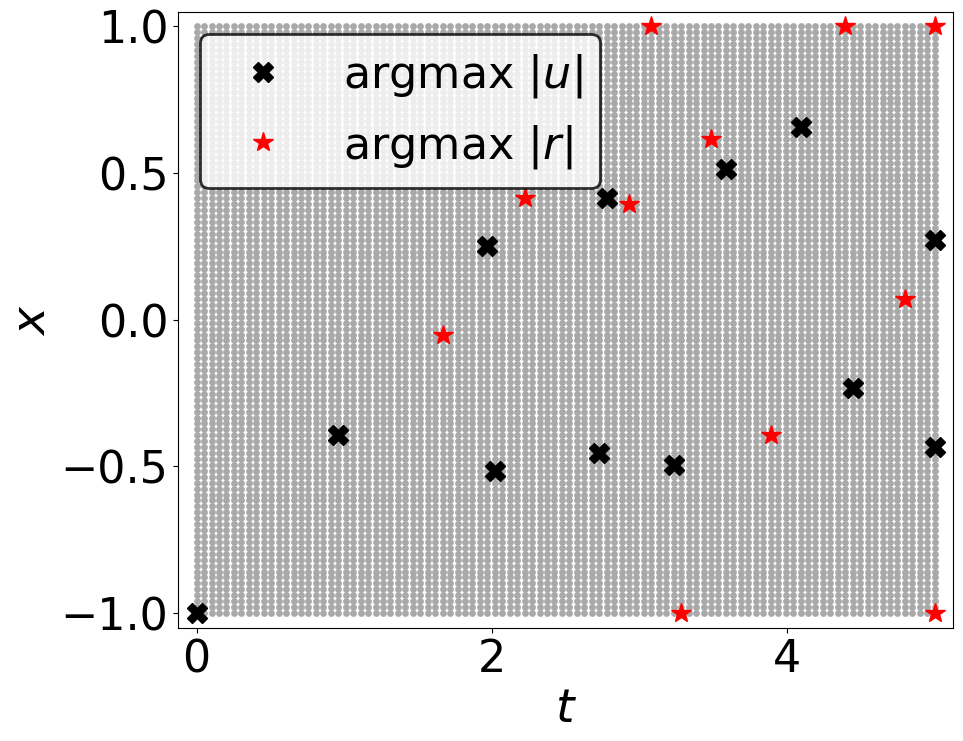

In [71]:
# Sparse training grid (plot3)
xt_resid   = np.loadtxt(path+"xt_resid.dat") # (10000,2)
X_umax_idx = np.loadtxt(path+"X_umax_idx.dat").astype(np.int64) # (13,)
X_rmax_idx = np.loadtxt(path+"X_rmax_idx.dat").astype(np.int64) # (12,)


x_u = xt_resid[X_umax_idx,0]
t_u = xt_resid[X_umax_idx,1]

x_r = xt_resid[X_rmax_idx,0]
t_r = xt_resid[X_rmax_idx,1]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(xt_resid[:, 1], xt_resid[:, 0], color="darkgray", s=15)

ax.plot(t_u, x_u, "X", color="black", label="argmax $|u|$", markersize=15)
ax.plot(t_r, x_r, "*", color="red",   label="argmax $|r|$", markersize=15)
ax.set_xlim(0-0.125,5+0.125)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylim(-1-0.05,1+0.05)
ax.set_ylabel("$x$", fontsize=34)
legend = ax.legend(frameon=True, fontsize=32)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=32)
#ax.grid()
plt.show()

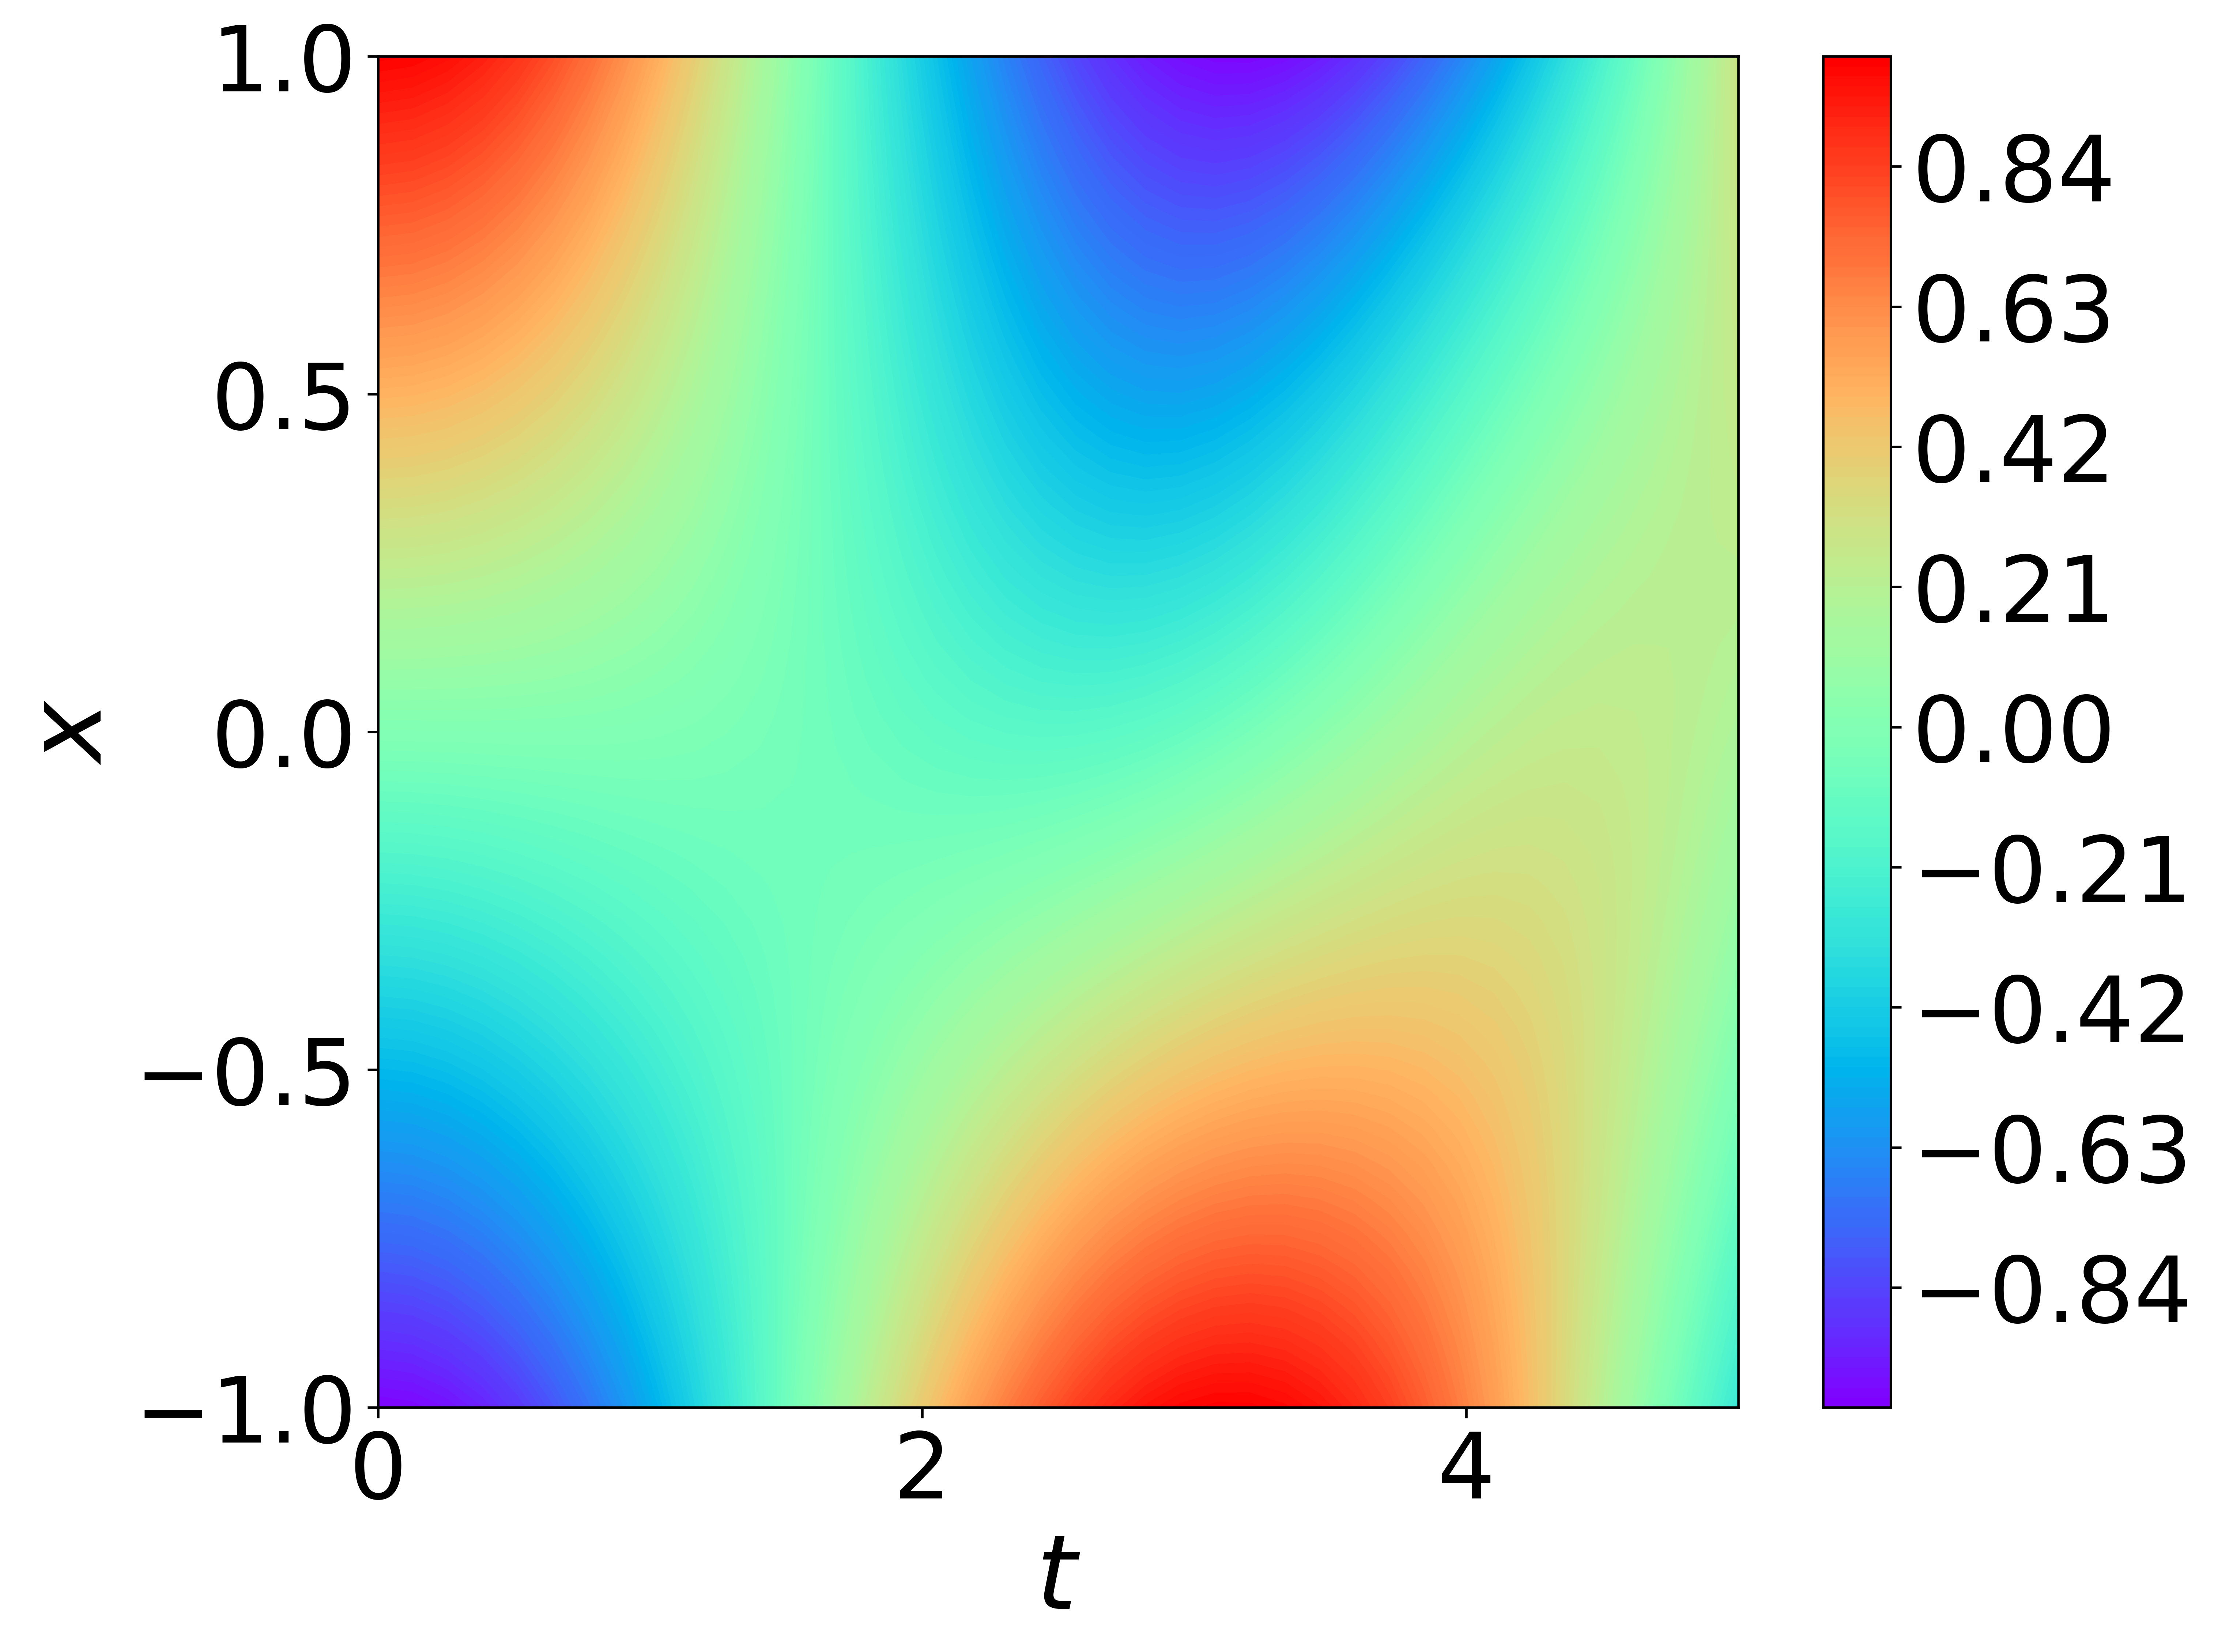

In [3]:
fig, ax = plt.subplots(figsize=(10,8),dpi=600)
plot = ax.contourf(t, x, ex_pinn_soln.reshape(shape).transpose(1,0), 150, cmap="rainbow")
cbar = fig.colorbar(plot)
cbar.ax.tick_params(labelsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax.text(0.025, 0.975, f"$L^2$ Error: {round(L2,4)}", transform=ax.transAxes, 
#         fontsize=34, verticalalignment='top', bbox=props)
#ax.set_title(fr"Error SGPT-PINN: $\nu={round(test_cases[index,0],2),round(test_cases[index,1],2),round(test_cases[index,2],2)}$", fontsize=25,pad=15)
ax.set_xlabel("$t$", fontsize=34)
ax.set_ylabel("$x$", fontsize=34)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.show()